In [1]:
import os
import time
import random
import pickle
import warnings
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader

from utils import *
from proposal import SimVPCBAM

In [2]:
# ignore warning message
warnings.filterwarnings('ignore')

# fix seed
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [3]:
if torch.cuda.is_available():
    print(f'GPU count: {torch.cuda.device_count()}')
    for i in range(torch.cuda.device_count()):
        print(f'GPU {i}: {torch.cuda.get_device_name(i)}')
        print(torch.cuda.get_device_properties(i))
else:
    print('No GPU')

GPU count: 2
GPU 0: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)
GPU 1: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)


In [4]:
# data : 2017~2021년 5월 31일까지의 전력 사용량 데이터
# train : 2017~2019년 3년동안의 전력 사용량 데이터(3년)
# val : 2020년 1년동안의 전력 사용량 데이터(1년)
# test : 2021년 5월 31일 6개월 동안의 전력 사용량 데이터(6개월)
elec = np.expand_dims(np.load('./dataset/2d_elec.npy'), axis=1)
elec_x, elec_y, elec_val = make_sequential(elec)

train_X = elec_x[:(365*24*3)]
train_y = elec_y[:(365*24*3)]

val_X = elec_x[(365*24*3):(365*24*4)]
val_y = elec_y[(365*24*3):(365*24*4)]

test_X = elec_x[(365*24*4):]
test_y = elec_y[(365*24*4):]

In [5]:
train_dataset = CustomDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, 64, pin_memory=True)

val_dataset = CustomDataset(val_X, val_y)
val_loader = DataLoader(val_dataset, 64, pin_memory=True)

test_dataset = CustomDataset(test_X, test_y)
test_loader = DataLoader(test_dataset, 64, pin_memory=True)

In [6]:
print(f'train_size: {len(train_dataset)}')
print(train_dataset.X.shape)
print(train_dataset.Y.shape)

print(f'val_size: {len(val_dataset)}')
print(val_dataset.X.shape)
print(val_dataset.Y.shape)

print(f'test_size: {len(test_dataset)}')
print(test_dataset.X.shape)
print(test_dataset.Y.shape)

train_size: 26280
(26280, 24, 1, 8, 20)
(26280, 24, 1, 8, 20)
val_size: 8760
(8760, 24, 1, 8, 20)
(8760, 24, 1, 8, 20)
test_size: 3577
(3577, 24, 1, 8, 20)
(3577, 24, 1, 8, 20)


In [7]:
X, _ = next(iter(train_loader))

path = './save_model/SimVPCBAM/'
check_path(path)
model = SimVPCBAM(X.shape[1:])

In [8]:
optimizer = torch.optim.AdamW(model.parameters(), lr=.001)
criterion = nn.MSELoss()
epochs = 100
# gpu 1 사용
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

train_loss, val_loss = train(model, optimizer, criterion, epochs, train_loader, val_loader, device, path=path+'best_SimVPCBAM')

100%|██████████| 137/137 [00:02<00:00, 59.85it/s]


Epoch [1/100] 30.25s
loss: 0.0057 | val_loss: 0.0047


100%|██████████| 137/137 [00:02<00:00, 60.53it/s]


Epoch [2/100] 28.96s
loss: 0.0040 | val_loss: 0.0044


100%|██████████| 137/137 [00:02<00:00, 59.26it/s]


Epoch [3/100] 28.75s
loss: 0.0035 | val_loss: 0.0047


100%|██████████| 137/137 [00:02<00:00, 58.75it/s]


Epoch [4/100] 28.86s
loss: 0.0033 | val_loss: 0.0047


100%|██████████| 137/137 [00:02<00:00, 59.02it/s]


Epoch [5/100] 28.65s
loss: 0.0032 | val_loss: 0.0046


100%|██████████| 137/137 [00:02<00:00, 59.72it/s]


Epoch [6/100] 28.28s
loss: 0.0032 | val_loss: 0.0040


100%|██████████| 137/137 [00:02<00:00, 60.58it/s]


Epoch [7/100] 28.37s
loss: 0.0031 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 57.81it/s]


Epoch [8/100] 28.24s
loss: 0.0030 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 58.95it/s]


Epoch [9/100] 28.95s
loss: 0.0030 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 63.40it/s]


Epoch [10/100] 28.72s
loss: 0.0029 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 57.76it/s]


Epoch [11/100] 28.56s
loss: 0.0029 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 58.96it/s]


Epoch [12/100] 28.81s
loss: 0.0029 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 60.45it/s]


Epoch [13/100] 28.33s
loss: 0.0028 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 58.07it/s]


Epoch [14/100] 28.63s
loss: 0.0028 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 57.72it/s]


Epoch [15/100] 28.49s
loss: 0.0027 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 61.26it/s]


Epoch [16/100] 28.82s
loss: 0.0027 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 59.07it/s]


Epoch [17/100] 28.33s
loss: 0.0027 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 60.60it/s]


Epoch [18/100] 28.55s
loss: 0.0026 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 64.62it/s]


Epoch [19/100] 28.08s
loss: 0.0026 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 61.87it/s]


Epoch [20/100] 28.51s
loss: 0.0026 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 59.19it/s]


Epoch [21/100] 28.68s
loss: 0.0025 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 58.66it/s]


Epoch [22/100] 28.46s
loss: 0.0024 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 58.74it/s]


Epoch [23/100] 27.64s
loss: 0.0024 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 59.17it/s]


Epoch [24/100] 28.07s
loss: 0.0023 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 58.64it/s]


Epoch [25/100] 28.98s
loss: 0.0023 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 58.21it/s]


Epoch [26/100] 28.52s
loss: 0.0023 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 59.52it/s]


Epoch [27/100] 28.47s
loss: 0.0022 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 61.57it/s]


Epoch [28/100] 28.38s
loss: 0.0022 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 61.55it/s]


Epoch [29/100] 29.36s
loss: 0.0021 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 60.71it/s]


Epoch [30/100] 30.04s
loss: 0.0021 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 59.09it/s]


Epoch [31/100] 28.86s
loss: 0.0021 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 58.65it/s]


Epoch [32/100] 28.35s
loss: 0.0020 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 59.05it/s]


Epoch [33/100] 29.04s
loss: 0.0020 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 58.86it/s]


Epoch [34/100] 28.79s
loss: 0.0020 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 57.38it/s]


Epoch [35/100] 29.02s
loss: 0.0020 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 58.97it/s]


Epoch [36/100] 28.69s
loss: 0.0019 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 58.77it/s]


Epoch [37/100] 28.57s
loss: 0.0019 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 63.48it/s]


Epoch [38/100] 28.62s
loss: 0.0018 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 61.06it/s]


Epoch [39/100] 28.34s
loss: 0.0018 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 61.95it/s]


Epoch [40/100] 31.97s
loss: 0.0017 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 63.82it/s]


Epoch [41/100] 27.81s
loss: 0.0017 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 57.34it/s]


Epoch [42/100] 28.89s
loss: 0.0017 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 60.42it/s]


Epoch [43/100] 28.53s
loss: 0.0016 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 58.94it/s]


Epoch [44/100] 28.75s
loss: 0.0016 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 58.94it/s]


Epoch [45/100] 28.08s
loss: 0.0016 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 56.31it/s]


Epoch [46/100] 28.31s
loss: 0.0016 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 57.49it/s]


Epoch [47/100] 28.82s
loss: 0.0016 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 62.74it/s]


Epoch [48/100] 28.36s
loss: 0.0015 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 59.03it/s]


Epoch [49/100] 28.61s
loss: 0.0014 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 60.32it/s]


Epoch [50/100] 28.24s
loss: 0.0014 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 56.56it/s]


Epoch [51/100] 28.28s
loss: 0.0013 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 58.03it/s]


Epoch [52/100] 28.64s
loss: 0.0013 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 59.48it/s]


Epoch [53/100] 28.44s
loss: 0.0013 | val_loss: 0.0040


100%|██████████| 137/137 [00:02<00:00, 59.71it/s]


Epoch [54/100] 28.82s
loss: 0.0013 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 59.70it/s]


Epoch [55/100] 28.88s
loss: 0.0013 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 60.10it/s]


Epoch [56/100] 28.70s
loss: 0.0013 | val_loss: 0.0041


100%|██████████| 137/137 [00:02<00:00, 59.35it/s]


Epoch [57/100] 28.81s
loss: 0.0013 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 58.47it/s]


Epoch [58/100] 28.55s
loss: 0.0013 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 60.81it/s]


Epoch [59/100] 28.30s
loss: 0.0012 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 59.30it/s]


Epoch [60/100] 28.32s
loss: 0.0012 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 61.88it/s]


Epoch [61/100] 28.95s
loss: 0.0011 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 61.82it/s]


Epoch [62/100] 27.83s
loss: 0.0011 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 59.73it/s]


Epoch [63/100] 28.48s
loss: 0.0011 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 59.45it/s]


Epoch [64/100] 27.96s
loss: 0.0011 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 58.69it/s]


Epoch [65/100] 28.44s
loss: 0.0011 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 59.37it/s]


Epoch [66/100] 28.83s
loss: 0.0011 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 59.26it/s]


Epoch [67/100] 28.66s
loss: 0.0010 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 62.69it/s]


Epoch [68/100] 29.00s
loss: 0.0010 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 62.64it/s]


Epoch [69/100] 28.09s
loss: 0.0010 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 60.44it/s]


Epoch [70/100] 28.12s
loss: 0.0010 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 60.21it/s]


Epoch [71/100] 28.78s
loss: 0.0010 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 59.94it/s]


Epoch [72/100] 27.80s
loss: 0.0009 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 61.03it/s]


Epoch [73/100] 28.35s
loss: 0.0009 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 59.33it/s]


Epoch [74/100] 28.62s
loss: 0.0009 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 59.61it/s]


Epoch [75/100] 28.75s
loss: 0.0008 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 60.30it/s]


Epoch [76/100] 28.53s
loss: 0.0008 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 61.24it/s]


Epoch [77/100] 28.64s
loss: 0.0008 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 58.28it/s]


Epoch [78/100] 28.82s
loss: 0.0008 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 59.30it/s]


Epoch [79/100] 28.73s
loss: 0.0008 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 59.18it/s]


Epoch [80/100] 28.49s
loss: 0.0007 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 60.04it/s]


Epoch [81/100] 28.70s
loss: 0.0007 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 64.70it/s]


Epoch [82/100] 28.19s
loss: 0.0007 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 65.86it/s]


Epoch [83/100] 27.55s
loss: 0.0007 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 65.05it/s]


Epoch [84/100] 27.79s
loss: 0.0007 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 61.33it/s]


Epoch [85/100] 27.72s
loss: 0.0007 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 56.34it/s]


Epoch [86/100] 28.29s
loss: 0.0007 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 60.83it/s]


Epoch [87/100] 28.67s
loss: 0.0007 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 60.66it/s]


Epoch [88/100] 28.80s
loss: 0.0007 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 60.05it/s]


Epoch [89/100] 28.83s
loss: 0.0006 | val_loss: 0.0016


100%|██████████| 137/137 [00:02<00:00, 59.48it/s]


Epoch [90/100] 27.82s
loss: 0.0006 | val_loss: 0.0017


100%|██████████| 137/137 [00:02<00:00, 57.89it/s]


Epoch [91/100] 28.41s
loss: 0.0006 | val_loss: 0.0018


100%|██████████| 137/137 [00:02<00:00, 58.48it/s]


Epoch [92/100] 28.22s
loss: 0.0006 | val_loss: 0.0018


100%|██████████| 137/137 [00:02<00:00, 57.92it/s]


Epoch [93/100] 28.14s
loss: 0.0006 | val_loss: 0.0017


100%|██████████| 137/137 [00:02<00:00, 58.53it/s]


Epoch [94/100] 28.60s
loss: 0.0005 | val_loss: 0.0016


100%|██████████| 137/137 [00:02<00:00, 60.14it/s]


Epoch [95/100] 28.90s
loss: 0.0006 | val_loss: 0.0017


100%|██████████| 137/137 [00:02<00:00, 66.91it/s]


Epoch [96/100] 28.69s
loss: 0.0006 | val_loss: 0.0016


100%|██████████| 137/137 [00:02<00:00, 67.60it/s]


Epoch [97/100] 30.27s
loss: 0.0006 | val_loss: 0.0018


100%|██████████| 137/137 [00:02<00:00, 68.12it/s]


Epoch [98/100] 31.68s
loss: 0.0006 | val_loss: 0.0018


100%|██████████| 137/137 [00:02<00:00, 67.76it/s]


Epoch [99/100] 32.05s
loss: 0.0006 | val_loss: 0.0018


100%|██████████| 137/137 [00:02<00:00, 67.93it/s]

Epoch [100/100] 32.79s
loss: 0.0005 | val_loss: 0.0018
Train time: 2875.79s
Best Epoch: 94, Best mse: 0.0016


In [9]:
with open(path + "train_loss.pkl","wb") as f:
    pickle.dump(train_loss, f)
    
with open(path + "val_loss.pkl","wb") as f:
    pickle.dump(val_loss, f)

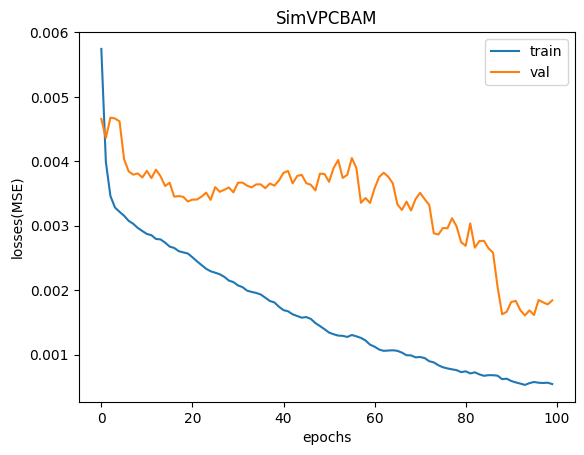

In [10]:
plt.title('SimVPCBAM')
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('losses(MSE)')
plt.legend()
plt.show()